# Raw Data: image alignment and overscan

ZTF raw data fits.fz files contains 8 entries: 4 data (the 4 read-out channel that will become the 4 quadrants) and 4 overscan (one per read-out channel). 

the `ztfimg.RawCCD` object is made to handle these data. You can quickly access the data as a whole (full ccd) or the individual quadrants. The data management (overscan and non-linearity corrections) are made at the quadrant level using the (`ztfimg.RawQuadrant`). A `ztfimg.RawCCD` object is basically a collection of `ztfimg.RawQuadrant`.

***
## RawCCD


### load a RawCCD
the easiest and most natural way to load a rawccd object is to use the `from_filename` class method (see other from_ methods)

In [51]:
import ztfimg

In [54]:
# This is the exact full path.
filename = "/Users/rigault/data/ztf/raw/2020/0401/152477/ztf_20200401152477_000517_zg_c06_o.fits.fz"
basename = "ztf_20200401152477_000517_zg_c06_o.fits.fz" # see as_path=False later on.

In [56]:
rawimg = ztfimg.RawCCD.from_filename(filename) # providing the exact path

If the image is stored within a normal ztfquery structure, you can simply provide the basename, ztfquery will know how to get back to the exact path. Set `as_path=False` is you use that. Remark that this option also enables you to download the image if needed be.

In [57]:
# providing the basename, will download the file if needed.
rawimg = ztfimg.RawCCD.from_filename(basename, as_path=False) 

### display the data

The 4 readout channel each have its gain etc, so you will see jumps in the image. The structure of the ztf ccd is as follows:
```
q2 | q1
—-------
q3 | q4
```

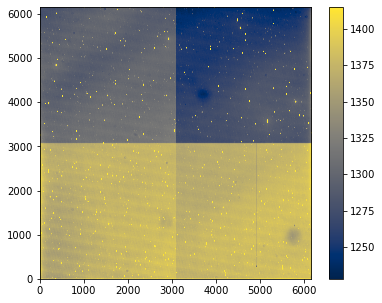

In [60]:
_ = rawimg.show()

### get the data

The `get_data` method will loop over the quadrant to get there data, reorganise them to get a continous sky.

In [62]:
data = rawimg.get_data()

you can request the overscan and nonlinearity correction (False by default)

In [65]:
dataclean = rawimg.get_data(corr_overscan=True, corr_nl=True)
dataclean

array([[1193.6869 , 1615.3705 , 1600.4529 , ..., 1598.6224 , 1611.4191 ,
        1185.7245 ],
       [ 706.7752 , 1098.8772 , 1133.4392 , ..., 1134.4481 , 1139.8842 ,
         670.7027 ],
       [ 718.9668 , 1148.9711 , 1146.1987 , ..., 1160.1718 , 1107.9059 ,
         725.9431 ],
       ...,
       [ 623.6655 , 1016.85974, 1018.354  , ..., 1218.3406 , 1162.5175 ,
         753.31903],
       [ 606.2413 , 1050.7832 , 1074.6671 , ..., 1266.1039 , 1227.1641 ,
         727.8859 ],
       [ 718.8187 , 1156.243  , 1130.2229 , ..., 1308.0664 , 1332.6337 ,
         876.15765]], dtype=float32)

### get the individual quadrant from rawccd

Say you want to look into the details of the data, you need to access the quadrant (read-out channel). Use the `get_quadrant()` method to do so. This will return a `RawQuadrant` object

In [78]:
q2 = rawimg.get_quadrant(2) # qid \in [1,2,3,4]

***
## RawQuadrant

data, as they are stored, are in `self.data`. get_data re-order them by default and enables the overscan and non-linearity (nl) corrections

### Data and overscan

In [81]:
data_as_stored = q2.data
data_as_stored

array([[1158.1693 , 1162.0898 , 1138.0361 , ..., 1130.2229 , 1156.243  ,
         718.8187 ],
       [1089.6094 , 1078.2024 , 1034.2406 , ..., 1074.6671 , 1050.7832 ,
         606.2413 ],
       [1029.8405 , 1025.9747 ,  998.01086, ..., 1018.354  , 1016.85974,
         623.6655 ],
       ...,
       [1055.0016 , 1021.65454, 1084.477  , ..., 1079.9486 , 1054.2092 ,
         690.4004 ],
       [1060.5804 , 1066.7966 , 1050.155  , ..., 1068.6858 , 1048.8248 ,
         670.98645],
       [1086.2886 , 1118.5999 , 1082.8016 , ..., 1062.3441 , 1086.7119 ,
         658.9373 ]], dtype=float32)

In [82]:
data = q2.get_data()

You have the same for the overscan

In [83]:
overscan_as_stored = q2.overscan
print(overscan_as_stored.shape)
overscan_as_stored

(3080, 30)


array([[119.08502 , 121.61354 , 119.66475 , ..., 166.4988  , 191.78949 ,
        249.46776 ],
       [118.2928  , 120.79559 , 120.288284, ..., 164.52103 , 185.65916 ,
        261.8302  ],
       [119.85344 , 122.46118 , 119.71309 , ..., 163.46179 , 188.96735 ,
        256.8821  ],
       ...,
       [124.43179 , 121.76079 , 121.40225 , ..., 163.66132 , 192.2597  ,
        255.02402 ],
       [122.37653 , 125.146835, 123.440796, ..., 165.20505 , 192.26529 ,
        253.542   ],
       [124.490456, 120.93608 , 123.268524, ..., 163.40166 , 187.65167 ,
        248.36089 ]], dtype=float32)

and get_overscan() enables you to access the overscan model, data (used for the model) or raw (as stored)

In [84]:
overdata_used = q2.get_overscan("data")
print(overdata_used.shape) # only using the [5,25] rows by default discarding first and last for the modelling
overdata_used

(3080, 20)


array([[121.945984, 121.243515, 120.4331  , ..., 127.06198 , 135.78477 ,
        137.11914 ],
       [121.65073 , 117.55092 , 118.717606, ..., 127.69003 , 133.99309 ,
        136.32646 ],
       [119.03253 , 122.38481 , 120.41713 , ..., 135.54243 , 131.90317 ,
        138.92291 ],
       ...,
       [120.62455 , 121.773964, 121.848076, ..., 131.34047 , 140.71294 ,
        138.56656 ],
       [124.303474, 121.52228 , 123.996826, ..., 131.44818 , 134.5946  ,
        142.8254  ],
       [121.46734 , 120.97294 , 123.60628 , ..., 130.08493 , 134.55086 ,
        136.753   ]], dtype=float32)

In [86]:
q2.get_overscan("model")

array([125.11133809, 125.11176778, 125.11219731, ..., 125.67612077,
       125.67605802, 125.67599511])

### Plotting

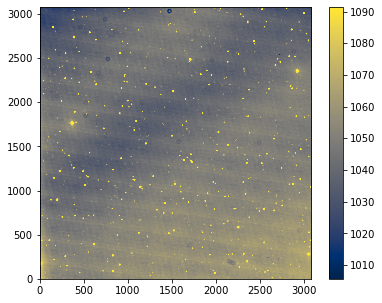

In [87]:
# Plot the data
_ = q2.show()

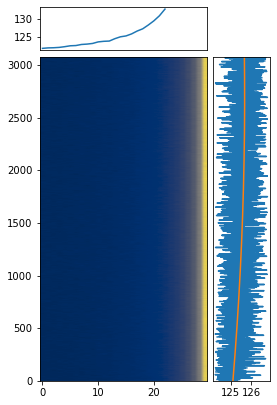

In [88]:
# Plot the overscan
_ = q2.show_overscan()

### Get last data and first overscan

In [90]:
last_data, first_overscan = q2.get_lastdata_firstoverscan()

### Load RawQuadrant from filename

RawQuadrant also have a from_filename method that inputs rawccd filename, simply provide the quadrant you want to load

In [91]:
q3 = ztfimg.RawQuadrant.from_filename(basename, as_path=False, qid=3)

In [92]:
q3.meta

year                     2020
month                      04
day                        01
filefracday    20200401152477
fracday                152477
paddedfield            000517
field                     517
ccdid                       6
filtercode                 zg
filterid                    1
kind                      raw
suffix              o.fits.fz
dtype: object

## Access Science Image from Raw

both `RawCCD` and `RawQuadrant` have ways to easily access their corresponding science image

In [99]:
sciimg_q2 = q2.get_sciimage() # this will download it is necessary (both sciimg and mask)

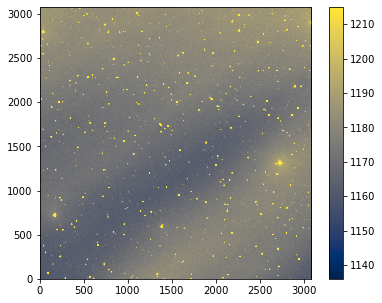

In [100]:
_ = sciimg_q2.show()

or at the ccd level

In [102]:
sciimg_ccd = rawimg.get_sciimage(as_ccd=True) # set as_ccd=False to get a list of 4 quadrant sciimg

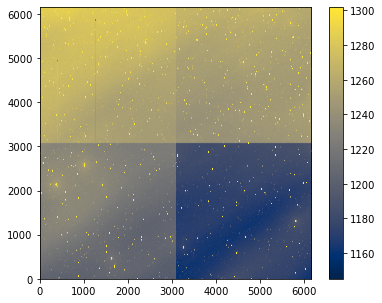

In [103]:
_ = sciimg_ccd.show()